In [1]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
import pymorphy2
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
import emoji
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import spacy
from imblearn.over_sampling import RandomOverSampler
from vk_api import VkApi
import vk_api
import requests
import json
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:


TOKEN_USER = 'd9f2d94ed9f2d94ed9f2d94e70dae43e10dd9f2d9f2d94ebc5624bc588b52ca0fadc400'
VERSION = 5.199
DOMAIN =  'mzd_rzd'

# через api vk вызываем статистику постов

post_zd = []
post_vodniy = []
offset = 0
while True:
    
    if offset == 2500:
        break
    response = requests.get('https://api.vk.com/method/wall.get',
    params={'access_token': TOKEN_USER,
            'v': VERSION,
            'domain': DOMAIN,
            'count': 100,
            'filter': str('owner'),
           'offset': offset})
    data_mzd_rzd = response.json()['response']['items']
    
    response = requests.get('https://api.vk.com/method/wall.get',
    params={'access_token': TOKEN_USER,
            'v': VERSION,
            'domain': 'rzd_official',
            'count': 100,
            'filter': str('owner'),
           'offset': offset})
    data_rzd_official = response.json()['response']['items']

    response = requests.get('https://api.vk.com/method/wall.get',
    params={'access_token': TOKEN_USER,
            'v': VERSION,
            'domain': 'awt_miit',
            'count': 100,
            'filter': str('owner'),
           'offset': offset})
    vodniy = response.json()['response']['items']
    
    post_zd.append(data_rzd_official)
    post_vodniy.append(vodniy)
    post_zd.append(data_mzd_rzd)
    offset +=100

In [3]:

dataX = []
vk = vk_api.VkApi(token=TOKEN_USER) # авторизация через токен (желательно)
api = vk.get_api()
comments_strings = []
# Печать заголовков новостей

for i in post_zd:
    
    for item in i:
        
        if 'copy_history' in item:
            post_id = item['id']
            likes = item['likes']['count']
            views = item['views']['count']
            reposts = item['reposts']['count']
            text = item['copy_history'][0]['text']
            timestamp = item['date']
            comments = item['comments']['count']
            group = 1
            dataX.append([post_id, likes, views, reposts, text, timestamp,comments,group])
            
        else:
            post_id = item['id']
            likes = item['likes']['count']
            views = item['views']['count']
            reposts = item['reposts']['count']
            text = item['text']
            timestamp = item['date']
            comments = item['comments']['count']
            
           
            group = 1
            
            dataX.append([post_id, likes, views, reposts, text, timestamp,comments,group])
for i in post_vodniy:
    
    for item in i:

    
        if 'copy_history' in item:
            post_id = item['id']
            likes = item['likes']['count']
            views = item['views']['count']
            reposts = item['reposts']['count']
            text = item['copy_history'][0]['text']
            timestamp = item['date']
            comments = item['comments']['count']
            group = 2
            dataX.append([post_id, likes, views, reposts, text, timestamp,comments,group])
            
        else:
            post_id = item['id']
            likes = item['likes']['count']
            views = item['views']['count']
            reposts = item['reposts']['count']
            text = item['text']
            timestamp = item['date']
            comments = item['comments']['count']
            
           
            group = 2
            
            dataX.append([post_id, likes, views, reposts, text, timestamp,comments,group])
            
df = pd.DataFrame(dataX, columns=['Post ID', 'Likes', 'Views', 'Reposts', 'Text', 'Timestamp','Comments','Group'])
display(df)


,Post ID,Likes,Views,Reposts,Text,Timestamp,Comments,Group
0,330434,186,16458,16,,1715612400,31,1
1,330370,380,14435,6,В архитектуре Казанского вокзала можно найти н...,1715592600,14,1
2,329704,464,20838,21,Сегодня мы отмечаем 79 годовщину победы в Вели...,1715238003,370,1
3,329564,761,31159,6,,1715180406,130,1
4,329496,190,22087,5,"По железной дороге в космос, это как? \n\nПоез...",1715160602,139,1
...,...,...,...,...,...,...,...,...
3953,6,18,565,1,"Нас мало, но мы в тельняшках! \n#команда\n#луч...",1648667633,0,2
3954,5,20,614,1,Пусть всегда будет солнце!\n#мызамир \n#АВТ #а...,1648667485,2,2
3955,4,15,511,0,"Российский университет транспорта, Харбинский ...",1648667306,0,2
3956,3,17,626,1,Дорогие друзья! Академия водного транспорта - ...,1648667199,1,2


In [4]:
df=df.drop_duplicates()#удаление дубликатов

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post ID    3892 non-null   int64 
 1   Likes      3892 non-null   int64 
 2   Views      3892 non-null   int64 
 3   Reposts    3892 non-null   int64 
 4   Text       3892 non-null   object
 5   Timestamp  3892 non-null   int64 
 6   Comments   3892 non-null   int64 
 7   Group      3892 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 243.4+ KB


In [5]:
df['Group'].value_counts()


Group
1    3407
2     497
Name: count, dtype: int64

In [6]:
df.isnull().sum()#переменные с пропуском

Post ID      0
Likes        0
Views        0
Reposts      0
Text         0
Timestamp    0
Comments     0
Group        0
dtype: int64

In [5]:
import re
import emoji
import spacy

# Загрузка модели для английского и русского языков
nlp_ru = spacy.load("ru_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Замена смайликов на их значения
    text = emoji.demojize(text)
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление неалфавитных символов
    text = re.sub(r'[^а-яА-Яa-zA-Z\s]', '', text)
    # Лемматизация для русских и английских слов
    doc_ru = nlp_ru(text)
    tokens_ru = [token.lemma_ for token in doc_ru if not token.is_stop and re.match(r'[а-яА-Я]', token.text)]
    
    doc_en = nlp_en(text)
    tokens_en = [token.lemma_ for token in doc_en if not token.is_stop and re.match(r'[a-zA-Z]', token.text)]
    
    return ' '.join(tokens_ru + tokens_en)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [6]:
df

,Post ID,Likes,Views,Reposts,Text,Timestamp,Comments,Group,Processed_Text
0,330434,186,16458,16,,1715612400,31,1,
1,330370,380,14435,6,В архитектуре Казанского вокзала можно найти н...,1715592600,14,1,архитектура казанский вокзал найти отсылка сто...
2,329704,464,20838,21,Сегодня мы отмечаем 79 годовщину победы в Вели...,1715238003,370,1,сегодня отмечать годовщина победа великий отеч...
3,329564,761,31159,6,,1715180406,130,1,
4,329496,190,22087,5,"По железной дороге в космос, это как? \n\nПоез...",1715160602,139,1,железный дорога космос поезд ракета создание р...
...,...,...,...,...,...,...,...,...,...
3953,6,18,565,1,"Нас мало, но мы в тельняшках! \n#команда\n#луч...",1648667633,0,2,тельняшках команда хороший студент автэтонавсегда
3954,5,20,614,1,Пусть всегда будет солнце!\n#мызамир \n#АВТ #а...,1648667485,2,2,солнце мызамир авт автэтонавсегда автрут
3955,4,15,511,0,"Российский университет транспорта, Харбинский ...",1648667306,0,2,российский университет транспорт харбинский ин...
3956,3,17,626,1,Дорогие друзья! Академия водного транспорта - ...,1648667199,1,2,дорогой друг академия водный транспорт единств...


In [12]:

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Group'], test_size=0.2, random_state=42)

# Преобразование меток в числовой формат
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.tolist())
y_test_encoded = label_encoder.transform(y_test.tolist())

# Токенизация текста
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train.tolist())

# Преобразование текста в последовательности индексов
X_train_seq = tokenizer.texts_to_sequences(X_train.tolist())
X_test_seq = tokenizer.texts_to_sequences(X_test.tolist())

# Подгонка длины последовательностей
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')



# Создание объекта RandomOverSampler
oversampler = RandomOverSampler()

# Применение oversampling к обучающим данным
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_pad, y_train_encoded)

# Создание модели
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128),
    LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Обучение модели с использованием Early Stopping и oversampled данными
history = model.fit(X_train_resampled, y_train_resampled, epochs=32, batch_size=64, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 52s 712ms/step - accuracy: 0.6908 - loss: 1.0902 - val_accuracy: 0.9391 - val_loss: 0.4350
Epoch 2/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 700ms/step - accuracy: 0.9718 - loss: 0.3466 - val_accuracy: 0.9705 - val_loss: 0.1906
Epoch 3/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 700ms/step - accuracy: 0.9870 - loss: 0.1695 - val_accuracy: 0.9852 - val_loss: 0.0991
Epoch 4/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 702ms/step - accuracy: 0.9913 - loss: 0.0950 - val_accuracy: 0.9880 - val_loss: 0.0717
Epoch 5/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 49s 715ms/step - accuracy: 0.9900 - loss: 0.0731 - val_accuracy: 0.9751 - val_loss: 0.1146
Epoch 6/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 49s 719ms/step - accuracy: 0.9891 - loss: 0.0799 - val_accuracy: 0.9880 - val_loss: 0.0476
Epoch 7/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 49s 718ms/step - accuracy: 0.9916 - loss: 0.0534 - val_accuracy: 0.9880 - val_loss: 0.0423
Epoch 8/32
68/68 ━━━━━━━━━━━━━━━━━━━━ 54s 796ms/step - accuracy: 0.9934 - loss: 0.0411 - val_accu

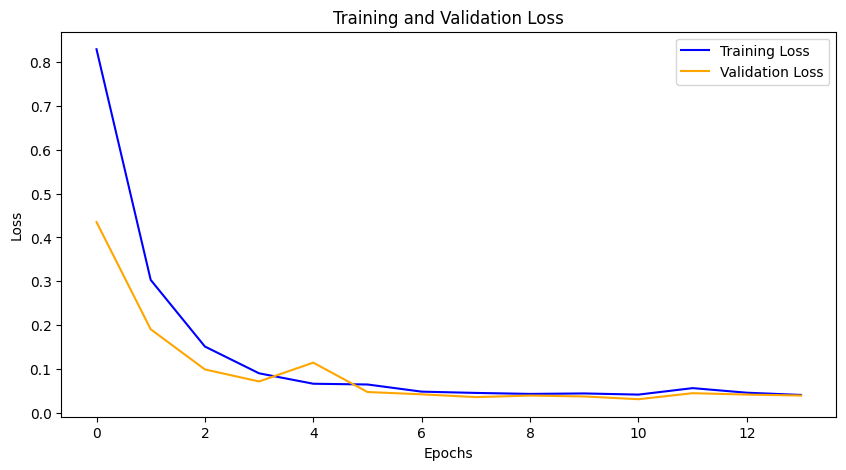

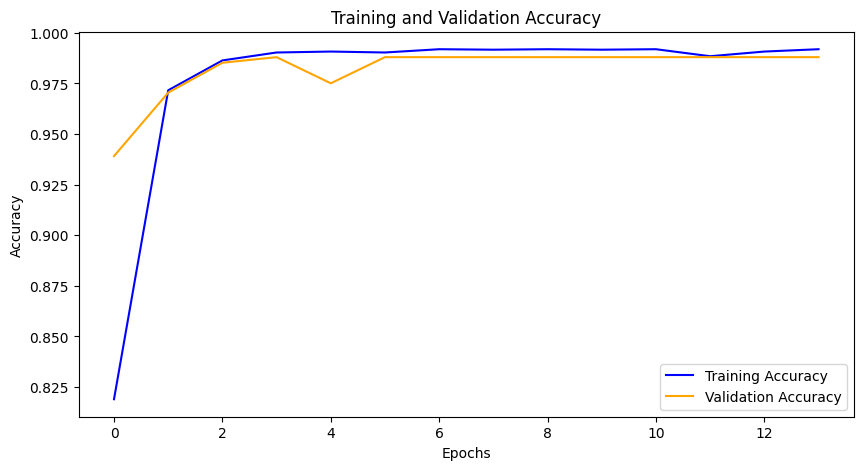

In [13]:
def plot_training_history(history):
    # Получаем значения функции потерь и точности на обучающем и валидационном наборах
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Строим график функции потерь
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Строим график точности
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy, label='Training Accuracy', color='blue')
    plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Пример использования
plot_training_history(history)

In [14]:
# Оценка модели на тестовом наборе данных
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Вычисление метрик
roc_auc = roc_auc_score(y_test_encoded, y_pred_probs[:, 1])  # Передаем вероятности для положительного класса
f1 = f1_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)

# Вывод значений метрик
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step
ROC AUC Score: 0.9619628339140535
F1 Score: 0.8875739644970414
Recall Score: 0.8928571428571429
Precision Score: 0.8823529411764706


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


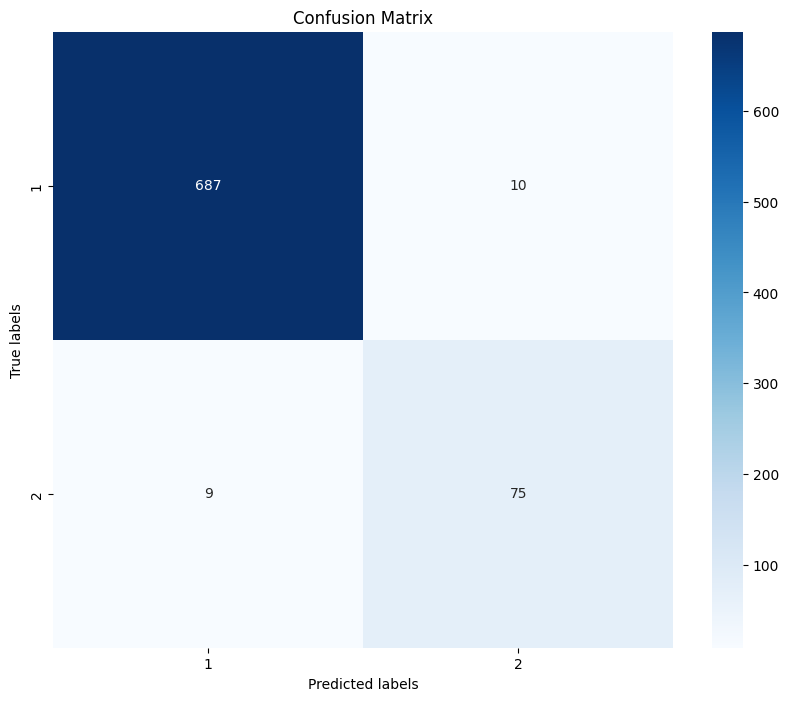

In [15]:


# Предсказание меток для тестового набора данных
y_pred = model.predict(X_test_pad)

# Конвертация предсказанных меток в индексы классов
y_pred_classes = np.argmax(y_pred, axis=1)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)
# Визуализация матрицы ошибок в виде тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [19]:

# Функция для предобработки текста нового поста
def preprocess_new_text(text):
    processed_text = preprocess_text(text)  # Применяем предобработку, которую вы определили ранее
    sequence = tokenizer.texts_to_sequences([processed_text])  # Преобразуем текст в последовательность индексов
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')  # Дополняем последовательность
    return padded_sequence

# Ввод текста нового поста
new_post_text =  "Жигулевская дистанция электроснабжения структурное подразделение Куйбышевской дирекции по энергообеспечению проводит профилактическую работу по предупреждению транспортных происшествий с несовершеннолетними в зоне движения поездов в период проведения детского месячника Уступи дорогу поездам!"

# Предобработка текста
preprocessed_new_post = preprocess_new_text(new_post_text)

# Предсказание категории для нового поста
predicted_class_probs = model.predict(preprocessed_new_post)
predicted_class_index = np.argmax(predicted_class_probs)

# Определение категории
predicted_class = label_encoder.classes_[predicted_class_index]

print("Новый пост отнесен к категории:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Новый пост отнесен к категории: 1
